# Covered Call

This [strategy](https://www.investopedia.com/terms/c/coveredcall.asp) involves purchasing a number of shares and simultaneously selling the same number of call options. 

If the stock price is below the strike price of the call options at expiration, the trader keeps the shares and pockets the option premium.

On the other hand, if the stock price rises above the strike price, it is sufficient to deliver the shares to the buyer of the call options at expiration for the option's strike price.

**Caveat: Options are very risky derivatives and, like any other type of financial vehicle, trading options requires due diligence. Transactions shown as examples of trading strategies with options in this notebook are not recommendations.**

In [7]:
from __future__ import print_function

import datetime as dt
import sys

import matplotlib.pyplot as plt
from numpy import zeros

from optionlab import VERSION, run_strategy

%matplotlib inline

In [8]:
print("Python version: %s" % sys.version)
print("OptionLab version: %s" % VERSION)

Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]
OptionLab version: 1.3.2


The underlying asset is Apple stock (ticker: APPL). We consider the stock price on January 18, 2021. The strategy involves buying 100 Apple shares at 164.04 and selling the same number of calls with a strike of 175. We collect a premium of 1.15 per call option, but we have to pay 164.04 per Apple share. Hence, this is a debit strategy.

In [9]:
stock_price = 10.63
volatility = 0.127
start_date = dt.date(2024, 12, 20)
target_date = dt.date(2025, 1, 3)
interest_rate = 0.001
min_stock = stock_price - round(stock_price * 0.5, 2)
max_stock = stock_price + round(stock_price * 0.5, 2)
strategy = [
    {"type": "stock", "n": 1000, "action": "buy","prev_pos":11.04},
    {"type": "call", "strike": 12.5, "premium": 0.56, "n": 1000, "action": "sell"}
    #{"type": "put", "strike": 15.00, "premium": 0.85, "n": 1000, "action": "sell"},
]

inputs = {
    "stock_price": stock_price,
    "start_date": start_date,
    "target_date": target_date,
    "volatility": volatility,
    "interest_rate": interest_rate,
    "min_stock": min_stock,
    "max_stock": max_stock,
    "strategy": strategy,
}

In [10]:
%%time
out = run_strategy(inputs)

CPU times: user 2.35 ms, sys: 1.46 ms, total: 3.81 ms
Wall time: 2.77 ms


Profit/loss profiles for each leg and the overall strategy are obtained by calling the *get_pl()* method and plotted at the option's maturity.

      10.49 ---> inf
Probability of Profit (PoP): 70.6%


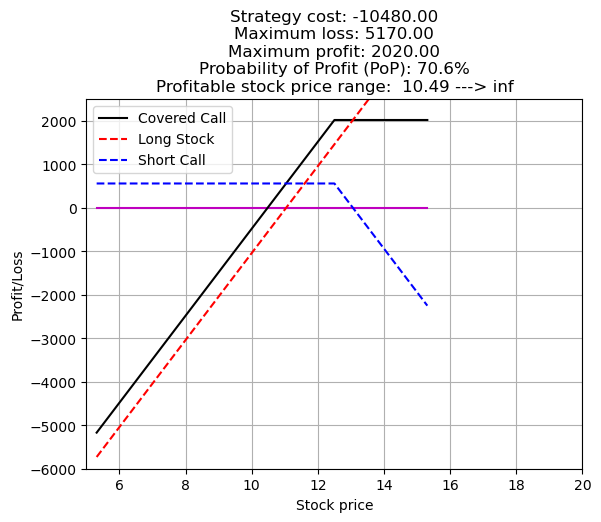

In [12]:
s, pl_total = out.data.stock_price_array, out.data.strategy_profit
leg = []

for i in range(len(strategy)):
    leg.append(out.data.profit[i])

zeroline = zeros(s.shape[0])
plt.xlabel("Stock price")
plt.ylabel("Profit/Loss")
plt.xlim(5, 20)
plt.ylim(-6000, 2500)
plt.plot(s, zeroline, "m-")
plt.plot(s, pl_total, "k-", label="Covered Call")
plt.plot(s, leg[0], "r--", label="Long Stock")
plt.plot(s, leg[1], "b--", label="Short Call")
#plt.plot(s,leg[2],"y--",label="Short Put")
plt.grid(True)
plt.legend(loc="upper left")
low = 0
high = 0
for low, high in out.profit_ranges:
    print("      %.2f ---> %.2f" % (low, high))

print("Probability of Profit (PoP): %.1f%%" % (out.probability_of_profit * 100.0))
plt.title("Strategy cost: %.2f" % out.strategy_cost+
          "\nMaximum loss: %.2f" % abs(out.minimum_return_in_the_domain)+
          "\nMaximum profit: %.2f" % out.maximum_return_in_the_domain+
          "\nProbability of Profit (PoP): %.1f%%" % (out.probability_of_profit * 100.0)
          +"\nProfitable stock price range:  %.2f ---> %.2f" % (low,high)
            )
plt.show()

Below one can see some useful results of the calculations made for the strategy, including its PoP.

In [35]:
print("Strategy cost: %.2f" % out.strategy_cost)
print("Maximum loss: %.2f" % abs(out.minimum_return_in_the_domain))
print("Maximum profit: %.2f" % out.maximum_return_in_the_domain)
print("Profitable stock price range:")

for low, high in out.profit_ranges:
    print("      %.2f ---> %.2f" % (low, high))

print("Probability of Profit (PoP): %.1f%%" % (out.probability_of_profit * 100.0))

Strategy cost: 4350.00
Maximum loss: 1110.00
Maximum profit: 4350.00
Profitable stock price range:
      10.66 ---> 29.34
Probability of Profit (PoP): 100.0%
